# qSMLM
a tool for modeling single molecule localization microscopy blinking kinetics

## d-Estimator
estimate the detection efficiency: d

by

Sebastian Malkusch

2018-06-29

single molecule biophysics,
Goethe-University Frankfurt, Germany

malkusch@chemie.uni-frankfurt.de

www.smb.uni-frankfurt.de

http://share.smb.uni-frankfurt.de

### Create Modelling System

In [8]:
import qsmlm
modeller = qsmlm.qsmlmDEstimator.QsmlmDEstimator()

qsmlmPEstimator initialized
qsmlmModel initialized
qsmlmData initialized


### Set Parameters
Set parameter values for the blinking model.
The blinking rate (p) needs to be determined within a former analysis using "qSMLM-p-Estimator"
Give an initial guess for the detection efficiency (initD).
The model needs to be of a single oligomeric state (state = int).

In [9]:
initD = 0.9
p = 0.2
state = 2

modeller.initQsmlmModel(state, initD, p)



number of states: 1


state vector:
[2]


normalized weight vector:
[1.]


d: 0.9


p: 0.2




### Load qSMLM Blinking Statistic Data Set
Define the columns to be loaded.
n  := blinking events
p0 := number of positive events
The histogram needs to exist of absolute event numbers (integer)

In [10]:
n=0
p0=1
modeller.loadData(n,p0)

loaded data from: E:/qSMLM/ssp-simulationen/single_oligo_states/trimer/histogram.txt


### Data Modeling
Model parameter estimation using a Trust Region Reflective algorithm  based least squares routine

In [11]:
modeller.lsOptimization()



number of states: 1


state vector:
[2]


normalized weight vector:
[1.]


d: 0.8088131723395625


p: 0.2


fitting results:
errors:
[0.00010831]


### Evaluate Model
Calculate information about how well the model fits the data

In [12]:
modeller.printModelStatistics()

number of observations:	994
number of estimated parameters:	1
LogL:	225.78139554
BIC:	-444.66105386
AIC:	-449.56279107
AICc:	-449.55875881


### Plot Modeling Results
Plot the LS-based model

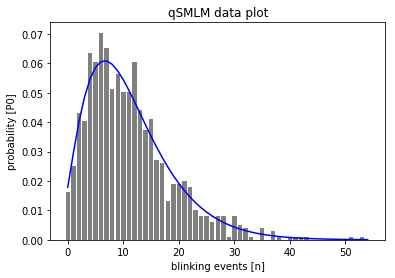

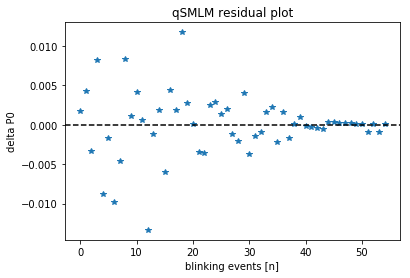

In [13]:
modeller.plotResults()

### Save Model
Save results of modelig routine

In [14]:
modeller.saveResults()


Modeling statistics written to 2018-11-01-histogram_d-estimation_ls-fit-statistics.txt

LS-based modeling results written to 2018-11-01-histogram_d-estimation_ls-ls-fit.txt


### Quote
"Blinking is, what we call, the reappearance of fluorscence.", Franziska Fricke